In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('netflix_titles.csv', encoding='latin1', sep=',')

In [3]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason SaldaÃ±a, Gustavo Sorola, ...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [4]:
df["date_added"]=df["date_added"].astype("datetime64")
df['year_added'] = df['date_added'].apply(lambda date: date.year)
df['month_added'] = df['date_added'].apply(lambda date: date.month)
df['season_count'] = df['duration'].apply(lambda d: int(d.split()[0]) if 'Season' in d else "")
df['duration'] = df['duration'].apply(lambda d: int(d.split()[0]) if 'min' in d else "")

In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,season_count
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019.0,9.0,
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016.0,9.0,
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,,Kids' TV,"With the help of three human allies, the Autob...",2018.0,9.0,1
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,,Kids' TV,When a prison ship crash unleashes hundreds of...,2018.0,9.0,1
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99,Comedies,When nerdy high schooler Dani finally attracts...,2017.0,9.0,


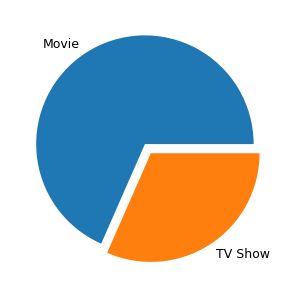

In [6]:
fig,ax = plt.subplots(dpi=90)
label = df['type'].unique()
t = df['type'].value_counts()
plt.pie(t,labels=label, explode=[0,0.1])
plt.show()

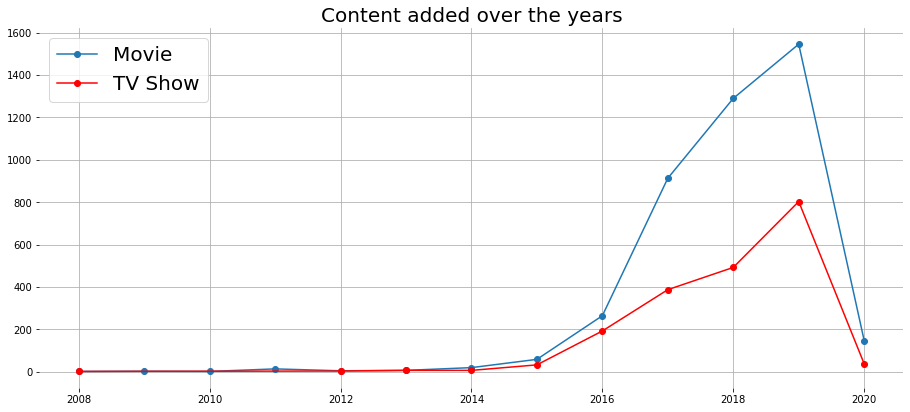

In [7]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_axes([0,0,1,1])
data1 = df[df['type']== 'Movie']['year_added'].value_counts()
data1 = data1.sort_index()
data2 = df[df['type']== 'TV Show']['year_added'].value_counts()
data2 = data2.sort_index()
plt.title('Content added over the years',fontdict={'fontsize':20})
plt.plot(data1,marker = 'o',label='Movie')
plt.plot(data2,marker = 'o',color='r',label='TV Show')
plt.legend(loc='upper left',fontsize=20)
plt.grid()
for sp in ['left', 'right', 'top', 'bottom']:
    ax.spines[sp].set_visible(False)
plt.show()

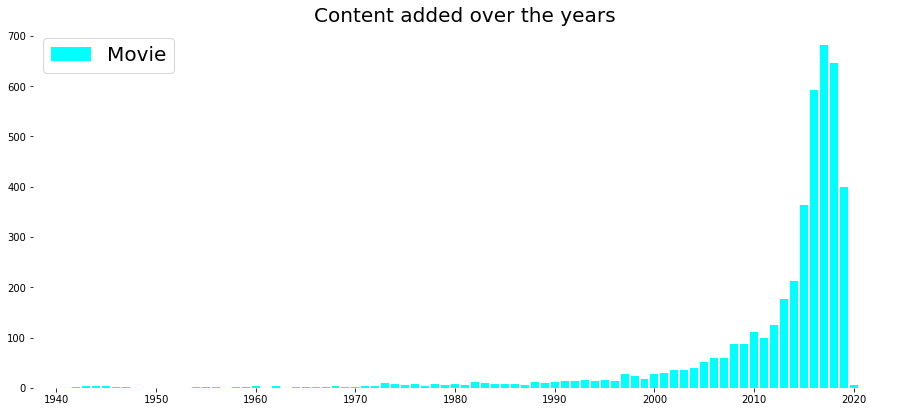

In [8]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_axes([0,0,1,1])
data1 = df[df['type']== 'Movie']['release_year'].value_counts()
data1 = data1.sort_index()
data2 = data1.index
#data2 = data2.sort_index()
#data2 = df[df['type']== 'TV Show']['year_added'].value_counts()
#data2 = data2.sort_index()
plt.title('Content added over the years',fontdict={'fontsize':20})
plt.bar(data2,data1,label='Movie',color='cyan')
#plt.plot(data2,marker = 'o',color='r',label='TV Show')
plt.legend(loc='upper left',fontsize=20)
#plt.grid()
for sp in ['left', 'right', 'top', 'bottom']:
    ax.spines[sp].set_visible(False)
plt.show()

In [9]:
df[df['type']== 'Movie'][['title','release_year']].sort_values('release_year',ascending=True)[:10]

,title,release_year
2013,The Battle of Midway,1942
2011,Prelude to War,1942
2023,Why We Fight: The Battle of Russia,1943
2026,WWII: Report from the Aleutians,1943
2022,Undercover: How to Operate Behind Enemy Lines,1943
2017,The Memphis Belle: A Story of a\nFlying Fortress,1944
2019,The Negro Soldier,1944
2021,Tunisian Victory,1944
2009,Nazi Concentration Camps,1945
2005,Know Your Enemy - Japan,1945


In [10]:
df[df['type']== 'TV Show'][['title','release_year']].sort_values('release_year',ascending=True)[:10]

,title,release_year
4292,Pioneers: First Women Filmmakers*,1925
4079,Pioneers of African-American Cinema,1946
5981,The Twilight Zone (Original Series),1963
5980,The Andy Griffith Show,1967
5704,Star Trek,1968
614,Monty Python's Fliegender Zirkus,1972
5669,Monty Python's Flying Circus,1974
5830,Dad's Army,1977
4273,El Chavo,1979
4369,Ninja Hattori,1981


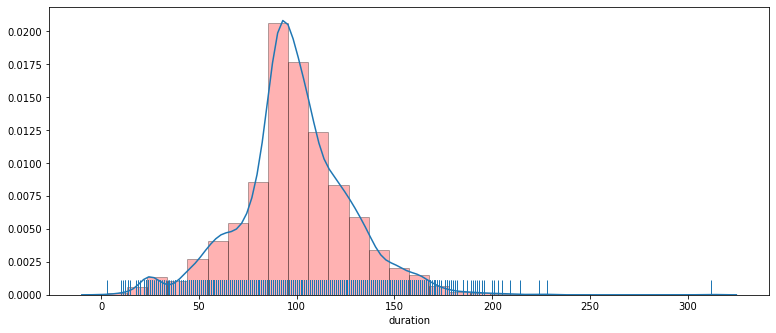

In [11]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_axes([0,0,1,1])
dur = df[df['type'] == 'Movie']['duration']
sns.distplot(dur,bins = 30,rug=True,hist_kws={'ec': 'black',"histtype": "barstacked", "linewidth": 1, "alpha": 0.3, "color": "red"})
plt.show()

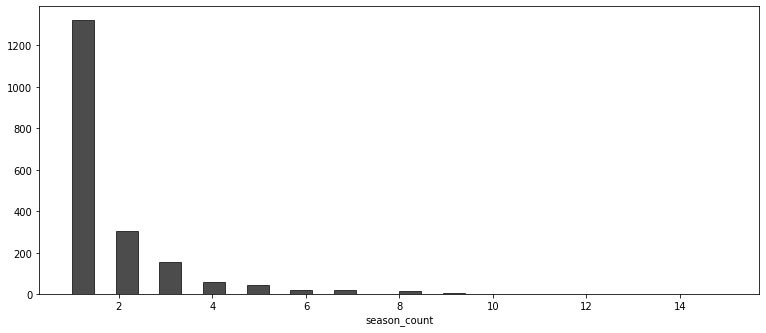

In [12]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_axes([0,0,1,1])
s = df[df['type'] == 'TV Show']['season_count']
sns.distplot(s,bins= 30,hist_kws={'ec': 'black',"histtype": "barstacked", "linewidth": 1, "alpha": 0.7
                                  , "color": "black"},kde=False)
plt.show()

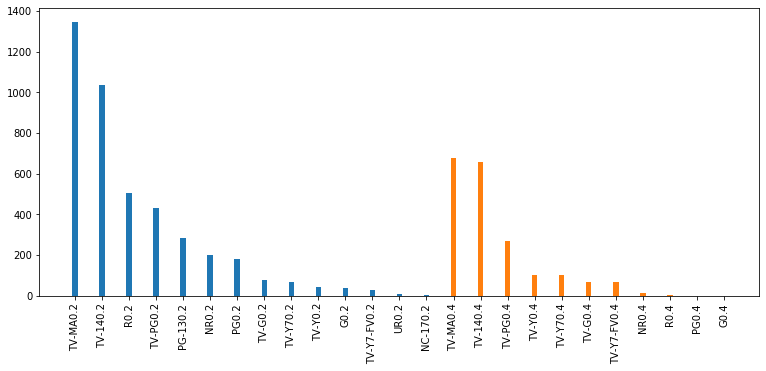

In [35]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_axes([0,0,1,1])
movie = df[df['type'] == 'Movie']['rating'].value_counts()
tv = df[df['type'] == 'TV Show']['rating'].value_counts()
plt.bar(movie.index+'0.2',movie,width= 0.20)
plt.bar(tv.index+'0.4',tv,width= 0.20)
plt.xticks(rotation=90)
#ax.legend(bbox_to_anchor =(0.25, 1.10), ncol=2)
ax.xaxis.grid(False)

In [26]:
movie

TV-MA       1348
TV-14       1038
R            506
TV-PG        432
PG-13        286
NR           202
PG           183
TV-G          80
TV-Y7         69
TV-Y          41
G             36
TV-Y7-FV      27
UR             7
NC-17          2
Name: rating, dtype: int64

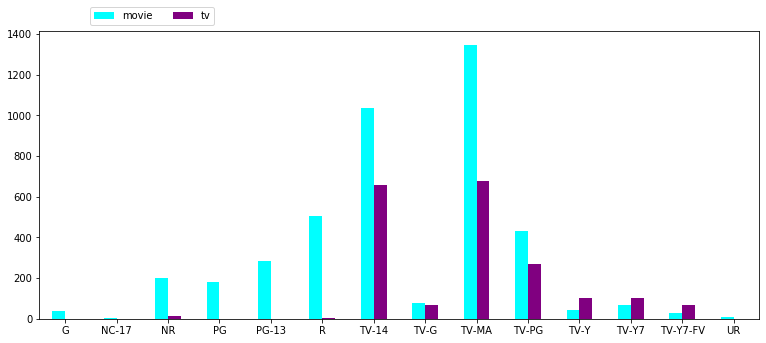

In [13]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_axes([0,0,1,1])
movie = df[df['type'] == 'Movie']['rating'].value_counts()
tv = df[df['type'] == 'TV Show']['rating'].value_counts()
rating = pd.DataFrame({
        'movie':movie,
        'tv':tv
    })
rating.plot(kind="bar",ax=ax,color=['cyan','purple'])
plt.xticks(rotation=0)
ax.legend(bbox_to_anchor =(0.25, 1.10), ncol=2)
ax.xaxis.grid(False)

In [14]:
star = df[(df['type'] == 'Movie') & (df['country']=='India')]['cast'].value_counts()[:25]

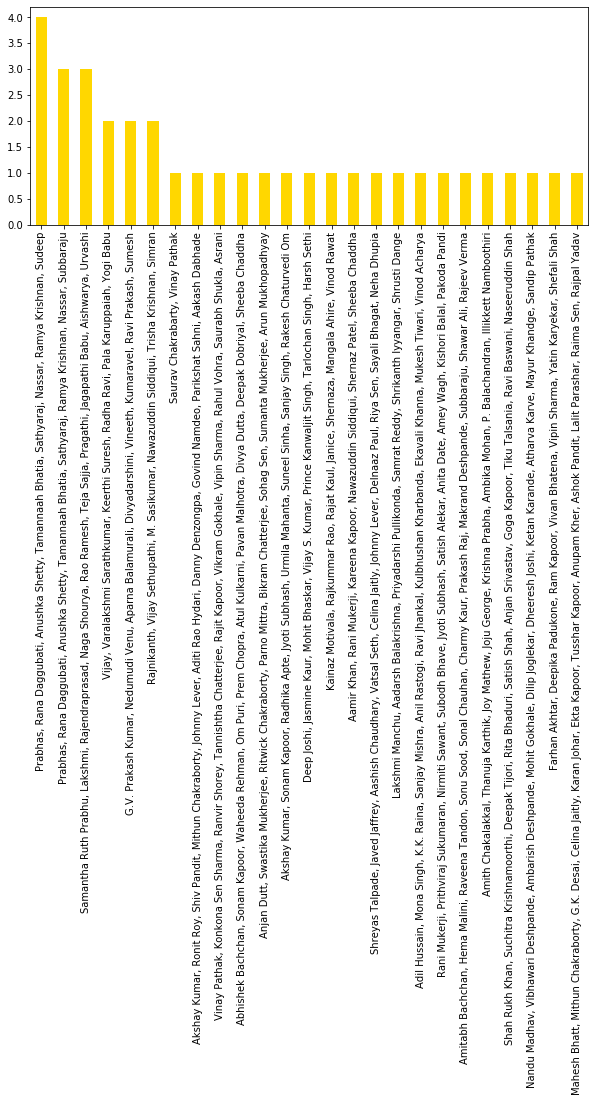

In [15]:
fig = plt.figure(figsize=(10,4))
star.plot(kind='bar',color='gold')

In [16]:
star = df[(df['type'] == 'Movie')]['cast'].value_counts()[:25]

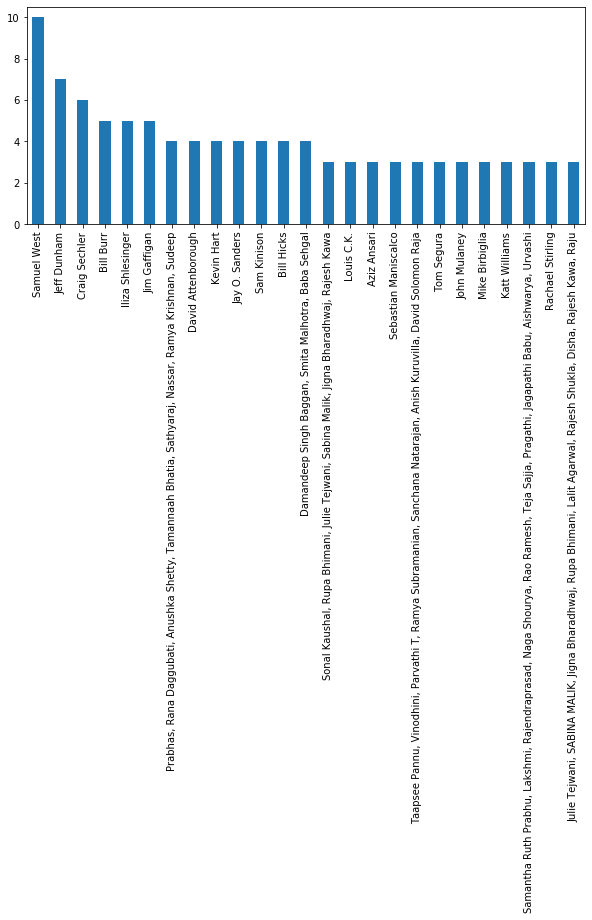

In [17]:
fig = plt.figure(figsize=(10,4))
star.plot(kind='bar')

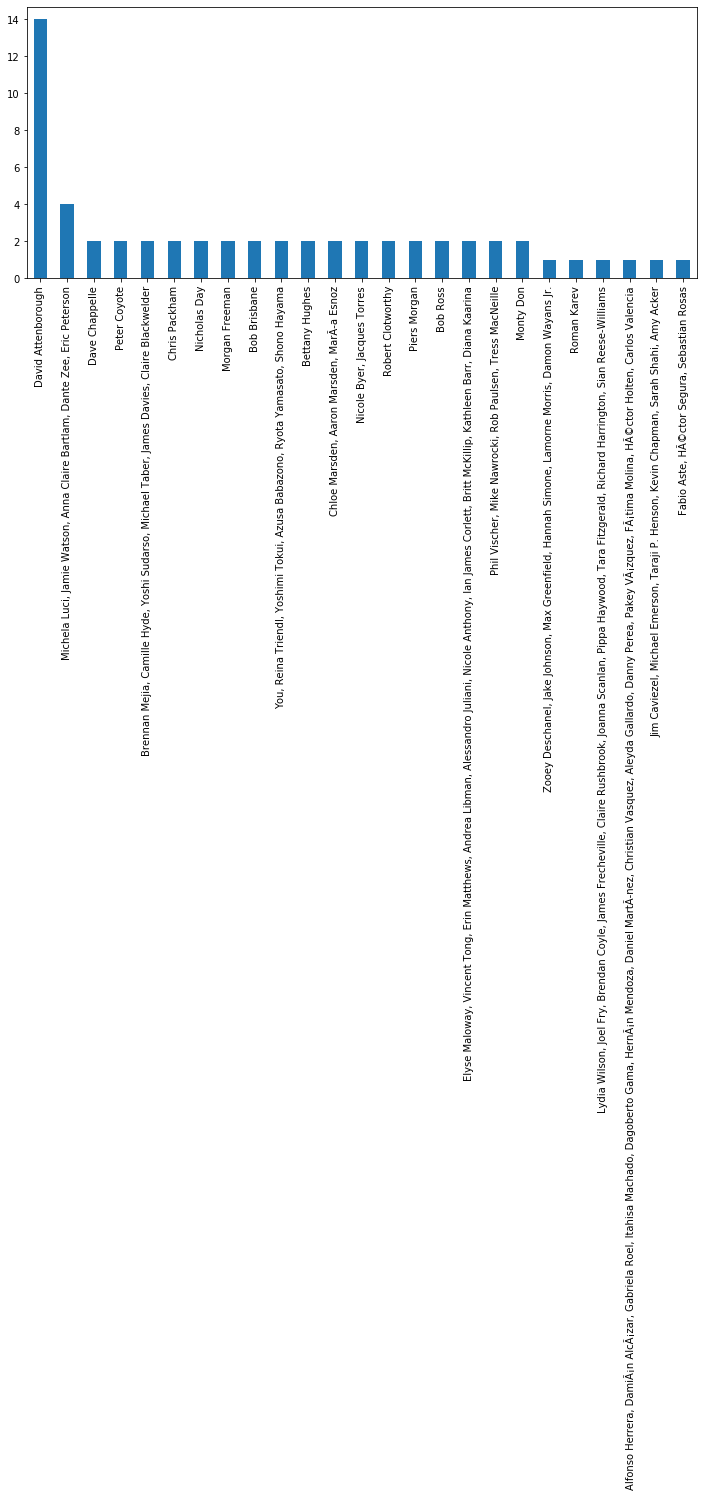

In [20]:
tv = df[(df['type'] == 'TV Show')]['cast'].value_counts()[:25]
fig = plt.figure(figsize=(12,5))
tv.plot(kind='bar')

In [27]:
df[df['listed_in'] == 'Stand-Up Comedy'][['title','cast','country']][:20]

,title,cast,country
1,Jandino: Whatever it Takes,Jandino Asporaat,United Kingdom
7,Fabrizio Copano: Solo pienso en mi,Fabrizio Copano,Chile
10,JoaquÃ­n Reyes: Una y no mÃ¡s,JoaquÃ­n Reyes,NaN
53,Marc Maron: Too Real,Marc Maron,United States
62,Mo Gilligan: Momentum,Mo Gilligan,United Kingdom
113,Def Comedy Jam 25,"Dave Chappelle, Steve Harvey, Cedric the Enter...",United States
126,Jeff Dunham: Beside Himself,Jeff Dunham,United States
134,Iliza Shlesinger: Confirmed Kills,Iliza Shlesinger,United States
152,Rafinha Bastos: Ultimatum,Rafinha Bastos,Brazil
181,Jerry Before Seinfeld,Jerry Seinfeld,United States


In [30]:
df[(df['listed_in'] == 'Stand-Up Comedy') & (df['country']=='India')][['title','cast']]

,title,cast
2937,Aditi Mittal: Things They Wouldn't Let Me Say,Aditi Mittal
